Este cuaderno tiene el objetivo de analizar y comprender los patrones de uso del transporte público y cómo estos patrones están influenciados por factores como la ubicación de las estaciones, la hora del día, el día de la semana, las condiciones climáticas, la distancia entre estaciones y el tiempo de viaje.
Mediante el análisis de estos datos, se pueden abordar problemas comerciales y analíticos, como:

- Optimizar la asignación de recursos y la planificación del transporte: Al identificar las áreas con mayor demanda y analizar los patrones de uso a lo largo del tiempo, las empresas de transporte pueden asignar recursos de manera más eficiente y planificar mejor sus horarios de transporte y rutas.

- Identificar patrones de demanda: Comprender los patrones de demanda puede ayudar a las empresas a adaptar sus servicios y anticipar las necesidades futuras.

- Mejorar la satisfacción del usuario: Al identificar áreas de mejora, como tiempos de viaje largos o conexiones inadecuadas entre estaciones, las empresas de transporte pueden tomar medidas para mejorar la experiencia del usuario y aumentar la satisfacción.

- Reducir el impacto ambiental: Al optimizar el uso de recursos y mejorar la eficiencia del transporte público, las empresas también pueden contribuir a la sostenibilidad ambiental.

(Utilizo datos ficticios ya que las APIs disponible del GCBA estan un poco incompletas en algunos datos claves de mi dataframe).

Este código crea un conjunto de datos ficticio con 2000 filas y las siguientes variables:

- Ubicacion_estacion: Ubicación de la estación (categórica: 'A', 'B', 'C', 'D', 'E')
-Hora_dia: Hora del día (entero: 0-23)
- Dia_semana: Día de la semana (categórica: 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo')
- Num_pasajeros: Número de pasajeros (entero: 0-500)
- Distancia_entre_estaciones: Distancia entre estaciones en metros (entero: 500-5000)
- Tiempo_viaje: Tiempo de viaje en minutos (entero: 5-60)
- Condiciones_climaticas: Condiciones climáticas (categórica: 'Soleado', 'Nublado', 'Lluvioso', 'Nevado')

  
  


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Número de filas en el conjunto de datos
num_rows = 2000

# Generar datos ficticios para el conjunto de datos de movilidad urbana
np.random.seed(42)
data = {
    'ubicacion_estacion': np.random.choice(['A', 'B', 'C', 'D', 'E'], size=num_rows),
    'hora_dia': np.random.randint(0, 24, size=num_rows),
    'dia_semana': np.random.choice(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], size=num_rows),
    'num_pasajeros': np.random.randint(0, 500, size=num_rows),
    'distancia_entre_estaciones': np.random.randint(500, 5000, size=num_rows),
    'tiempo_viaje': np.random.randint(5, 60, size=num_rows),
    'condiciones_climaticas': np.random.choice(['Soleado', 'Nublado', 'Lluvioso', 'Nevado'], size=num_rows)
}

# Crear un DataFrame de pandas con los datos generados
movilidad_urbana_data = pd.DataFrame(data)

# Ver las primeras 10 filas del DataFrame
print(movilidad_urbana_data.head(10))


  ubicacion_estacion  hora_dia dia_semana  num_pasajeros  \
0                  D         6    Viernes              3   
1                  E        10    Domingo            326   
2                  C         9     Sábado            409   
3                  E         8    Viernes            366   
4                  E        13     Sábado            305   
5                  B        12      Lunes            395   
6                  C         1      Lunes             94   
7                  C         2    Viernes            208   
8                  C         6      Lunes            224   
9                  E        20     Jueves            458   

   distancia_entre_estaciones  tiempo_viaje condiciones_climaticas  
0                         569            23                Nublado  
1                        4424            55                Nublado  
2                        2586            53               Lluvioso  
3                        2507            10                Nubl

Identificar estaciones con mayor demanda:

In [3]:
estaciones_demanda = movilidad_urbana_data.groupby('ubicacion_estacion')['num_pasajeros'].sum()
estaciones_demanda = estaciones_demanda.reset_index()
estaciones_demanda.sort_values(by='num_pasajeros', ascending=False, inplace=True)

print("Estaciones con mayor demanda:")
print(estaciones_demanda)


Estaciones con mayor demanda:
  ubicacion_estacion  num_pasajeros
1                  B         102654
4                  E         101033
0                  A          98925
2                  C          95606
3                  D          90152


Análisis del impacto de las condiciones climáticas en la demanda:

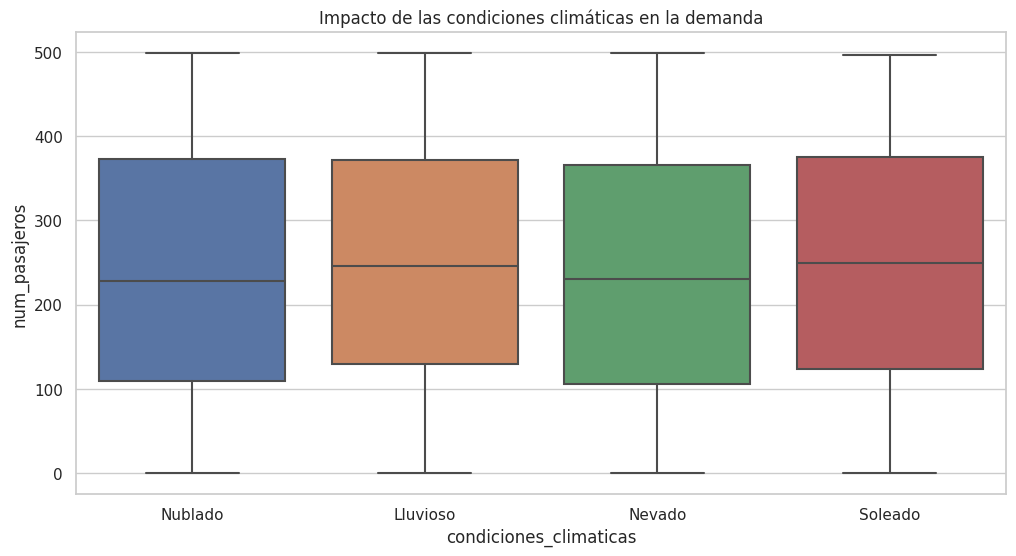

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='condiciones_climaticas', y='num_pasajeros', data=movilidad_urbana_data)
plt.title("Impacto de las condiciones climáticas en la demanda")
plt.show()

Análisis del tiempo de viaje y la distancia entre estaciones: 

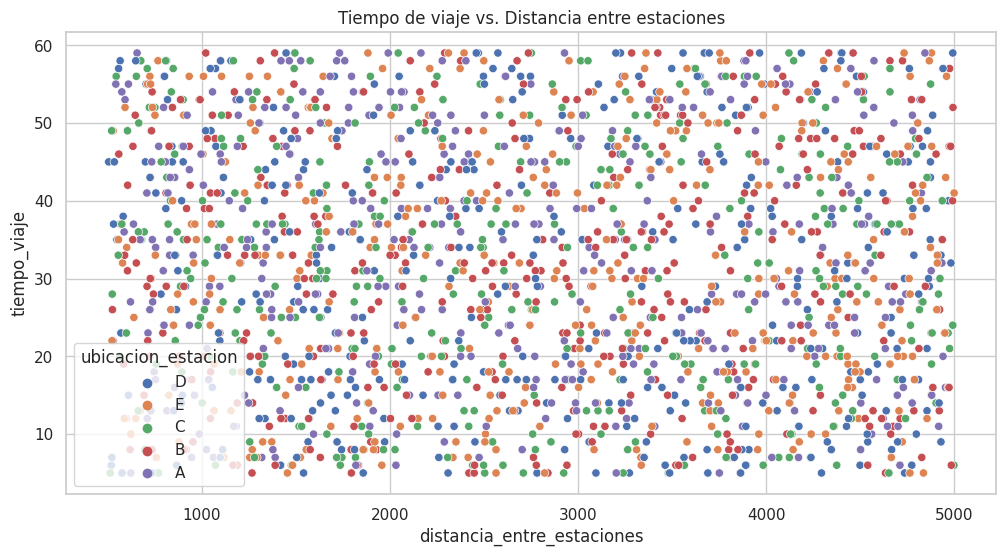

In [5]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distancia_entre_estaciones', y='tiempo_viaje', hue='ubicacion_estacion', data=movilidad_urbana_data)
plt.title("Tiempo de viaje vs. Distancia entre estaciones")
plt.show()


Análisis de demanda por hora y día de la semana:

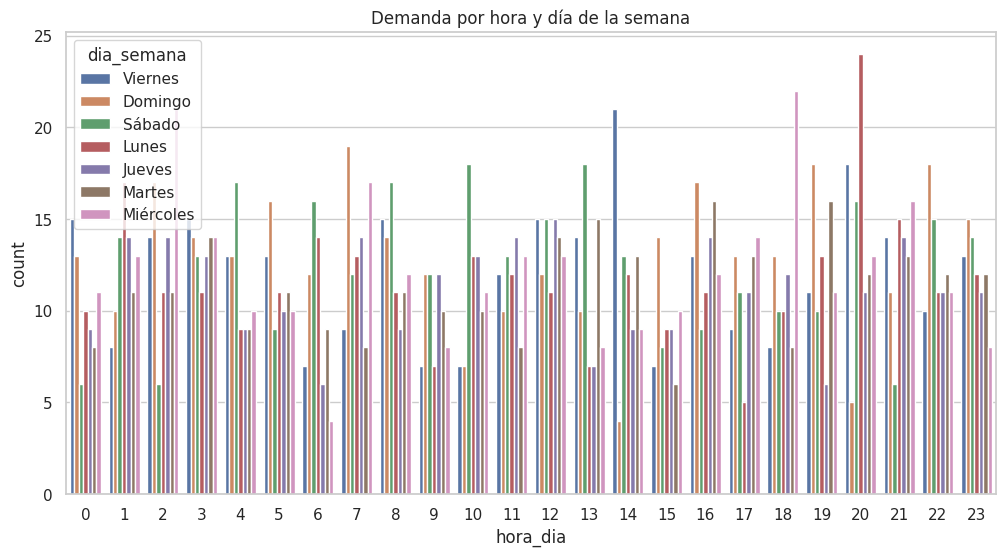

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='hora_dia', hue='dia_semana', data=movilidad_urbana_data)
plt.title("Demanda por hora y día de la semana")
plt.show()
